In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
X=pd.read_csv('TrainingData/Linear_X_Train.csv').values
Y=pd.read_csv('TrainingData/Linear_Y_Train.csv').values

In [22]:
print(X.shape)
print(Y.shape)

(3750, 1)
(3750, 1)


In [23]:
X=(X-X.mean())/X.std()

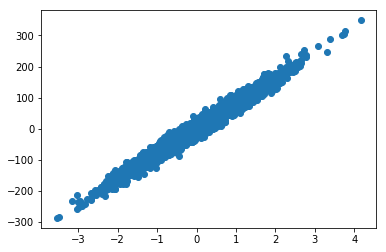

In [24]:
plt.scatter(X,Y)
plt.show()

In [25]:
def y_hat(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    Y_ = y_hat(theta,X)
    e =  np.sum((Y_ - Y)**2)
    m = X.shape[0]
    return e/m

def getGrad(X,Y,theta):
    grad = np.zeros((2,))
    Y_ = y_hat(theta,X)
    
    grad[0] = 2*np.sum(Y_ - Y)
    grad[1] = 2*np.sum( (Y_ - Y)*X)
    m = X.shape[0]
    return grad/m
    

def gradDescent(X,Y,lr=0.01):
    theta = np.zeros((2,))
    
    error_list = []
    #grad = getGrad(X,Y,theta)
    #theta= theta - lr*grad
    #e = error(X,Y,theta)
    #print(e)
    #while(e>=10):
    for i in range(3000):
        grad = getGrad(X,Y,theta)
        theta= theta - lr*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list

In [26]:
theta,error_list = gradDescent(X,Y)

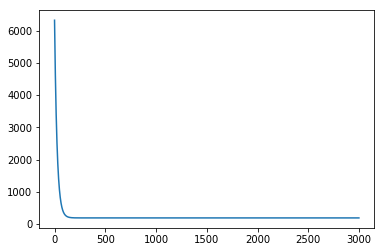

In [27]:
plt.plot(error_list)
plt.show()

In [28]:
print(theta)

[ 0.68386897 79.90573694]


In [35]:
 theta=np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,Y))
 print(theta)

[[79.90573694]]


In [36]:
x=pd.read_csv('TestCases/Linear_X_Test.csv')
x.values
y_ = np.dot(x,theta)


In [38]:
#print(y_.shape)
df=pd.DataFrame(y_)
print(y_[1])

[-69.44063567]


In [39]:
df.to_csv('TestCases/sample_submission_linear.csv',index=False)

In [113]:
# import csv
# with open('TestCases/sample_submission_linear.csv','w',newline='') as f:
#     fwriter = csv.writer(f)
#     fwriter.writerow(['y'])
#     for i in range(1,Y_.shape[0]):
#         fwriter.writerow(Y_[i])